# Packages

In [1]:
import sys

sys.executable  # envs/snakepipes_detect-seq/bin/python

'/Users/zhaohuanan/micromamba/envs/snakepipes_detect-seq/bin/python'

In [2]:
from bioat.lib.libpath import HOME
from bioat.lib.libpandas import set_option

set_option()
print(HOME)

INFO  @ 2023-08-16 01:16:14 bioat.lib.libpandas.set_option: set pandas: max_colwidth=40
INFO  @ 2023-08-16 01:16:14 bioat.lib.libpandas.set_option: set pandas: display.width=120
INFO  @ 2023-08-16 01:16:14 bioat.lib.libpandas.set_option: set pandas: display.max_columns=None
INFO  @ 2023-08-16 01:16:14 bioat.lib.libpandas.set_option: set pandas: display.max_rows=50


/Users/zhaohuanan


In [3]:
# circosplot
import collections
import pandas as pd
import math
from bioat.lib.libcircos import Garc, Gcircle, table_hg38_chromosome_length, table_hg38_cytoband
from bioat.lib.libcolor import plot_colortable
import matplotlib.pyplot as plt

# Global analysis

## circos plot

In [4]:
# resources
url = "https://raw.githubusercontent.com/hermanzhaozzzz/bioat/master/data/circos"

### 辅助函数

#### plot_colortable

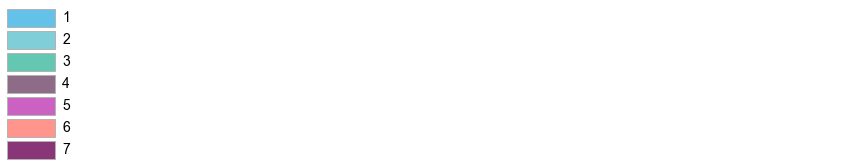

In [5]:
# %% function for legend
# %%% test func plot_colortable
colors = ['#64C1E8',
          '#80CED7',
          '#63C7B2',
          '#8E6C88',
          '#CA61C3',
          '#FF958C',
          '#883677']
g = plot_colortable(colors, ncols=1, labels=[1, 2, 3, 4, 5, 6, 7])
# g

#### gcircle_add_garc

In [6]:
def gcircle_add_garc(x):
    arc = Garc(
        arc_id=x['chr'], size=x['end'], interspace=1, raxis_range=(920, 950),
        labelposition=40, label_visible=True, facecolor='#FFFFFF'
    )
    circle.add_garc(arc)

### table
#### chromosomes

In [7]:
df_chrom = table_hg38_chromosome_length()
df_chrom = df_chrom[df_chrom['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_chrom

,chr,start,end
0,chr1,1,249250621
1,chr2,1,243199373
2,chr3,1,198022430
3,chr4,1,191154276
4,chr5,1,180915260
5,chr6,1,171115067
6,chr7,1,159138663
7,chr8,1,146364022
8,chr9,1,141213431
9,chr10,1,135534747


#### cytoBand

In [8]:
df_cytoband = table_hg38_cytoband()
df_cytoband = df_cytoband[df_cytoband['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_cytoband['name'] = df_cytoband['chr']
df_cytoband['start'] = df_cytoband['start'] - 1
df_cytoband['width'] = df_cytoband['end'] - df_cytoband['start']
df_cytoband

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001
...,...,...,...,...,...,...,...
846,chrX,134499999,138900000,q26.3,gneg,chrX,4400001
847,chrX,138899999,141200000,q27.1,gpos75,chrX,2300001
848,chrX,141199999,143000000,q27.2,gneg,chrX,1800001
849,chrX,142999999,148000000,q27.3,gpos100,chrX,5000001


#### points

In [9]:
# sort_keys = df_points.groupby('<sample>').count().sort_values(by='chr', ascending=False).index
sort_keys = ['DetectSeq_SIRT6-DddA11_REP-1', 'DetectSeq_SIRT6-DddA11_REP-2',
             'DetectSeq_JAK2-DddA11_REP-1', 'DetectSeq_JAK2-DddA11_REP-2',
             'DetectSeq_ATP8-DddA11_REP-1', 'DetectSeq_ATP8-DddA6_REP-1', 'DetectSeq_ATP8-DddAwt_REP-1']
colors = ['#64C1E8',
          '#80CED7',
          '#5AB4C8',
          '#78C8C8',
          '#FF958C',
          '#D7BFF8',
          '#F8EDD0']
df_points = pd.read_csv('../final_list_after_igv_check/2023-04-24_merged_final_list_add_header_poisson_result.csv',
                        usecols=['<sample>', 'chr_name', 'region_start', 'region_end', 'treat_mut_count.norm'])
df_points.columns = ['<sample>', 'chr', 'start', 'end', 'value1']
df_points = df_points[df_points['chr'].map(lambda x: x not in ['chrY', 'chrM'])].copy()
df_points['log10_value'] = df_points['value1'].map(math.log10)
df_points

,<sample>,chr,start,end,value1,log10_value
0,DetectSeq_ATP8-DddA11_REP-1,chr11,28107123,28107196,0.113256,-0.945938
1,DetectSeq_ATP8-DddA11_REP-1,chr4,127523472,127523528,0.125178,-0.902473
2,DetectSeq_ATP8-DddA11_REP-1,chr10,79996559,79996604,0.095374,-1.020572
3,DetectSeq_ATP8-DddA11_REP-1,chr20,36808712,36808741,0.089413,-1.048601
4,DetectSeq_ATP8-DddA11_REP-1,chr9,115952242,115952303,0.095374,-1.020572
...,...,...,...,...,...,...
15392,DetectSeq_SIRT6-DddA11_REP-2,chr1,148725246,148725266,0.060375,-1.219144
15393,DetectSeq_SIRT6-DddA11_REP-2,chr8,81158725,81158758,0.069663,-1.156996
15394,DetectSeq_SIRT6-DddA11_REP-2,chr8,100191816,100191830,0.060375,-1.219144
15395,DetectSeq_SIRT6-DddA11_REP-2,chr17,32831978,32831991,0.097529,-1.010868


### plot

#### plot chromosomes

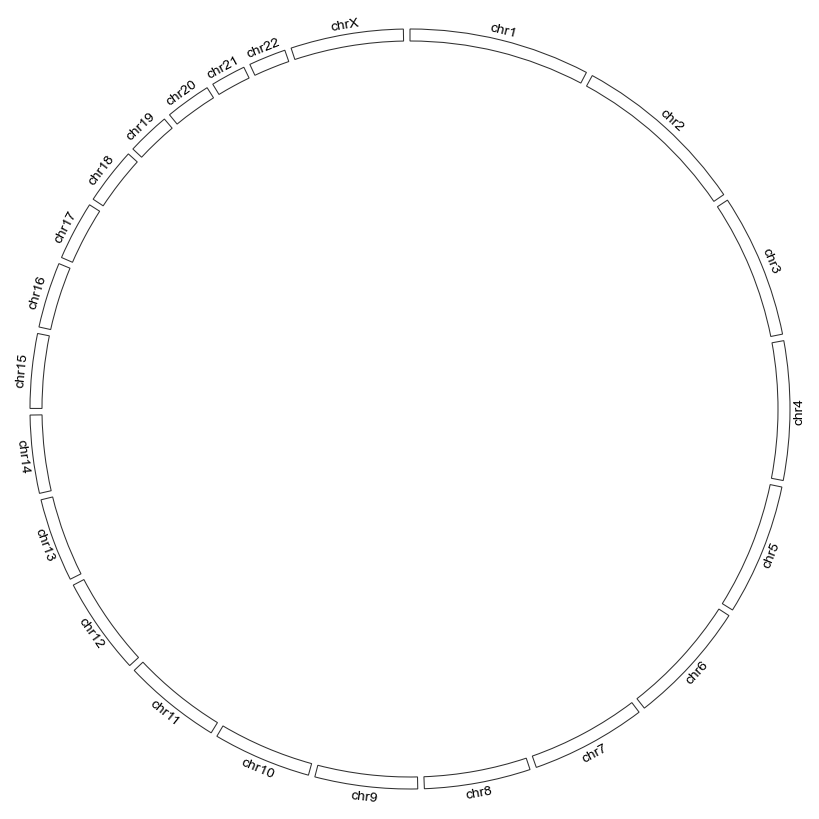

In [10]:
# 实例化一个Gcircle对象
circle = Gcircle()
df_chrom.apply(gcircle_add_garc, axis=1)
circle.set_garcs()
# circle.figure;

#### plot cytoband

- cytoband 染色体带: 处于中期的细胞染色体上形成的用于识别特定染色体的带型

In [11]:
df_cytoband.head()

,chr,start,end,value1,value2,name,width
0,chr1,-1,2300000,p36.33,gneg,chr1,2300001
1,chr1,2299999,5300000,p36.32,gpos25,chr1,3000001
2,chr1,5299999,7100000,p36.31,gneg,chr1,1800001
3,chr1,7099999,9100000,p36.23,gpos25,chr1,2000001
4,chr1,9099999,12500000,p36.22,gneg,chr1,3400001


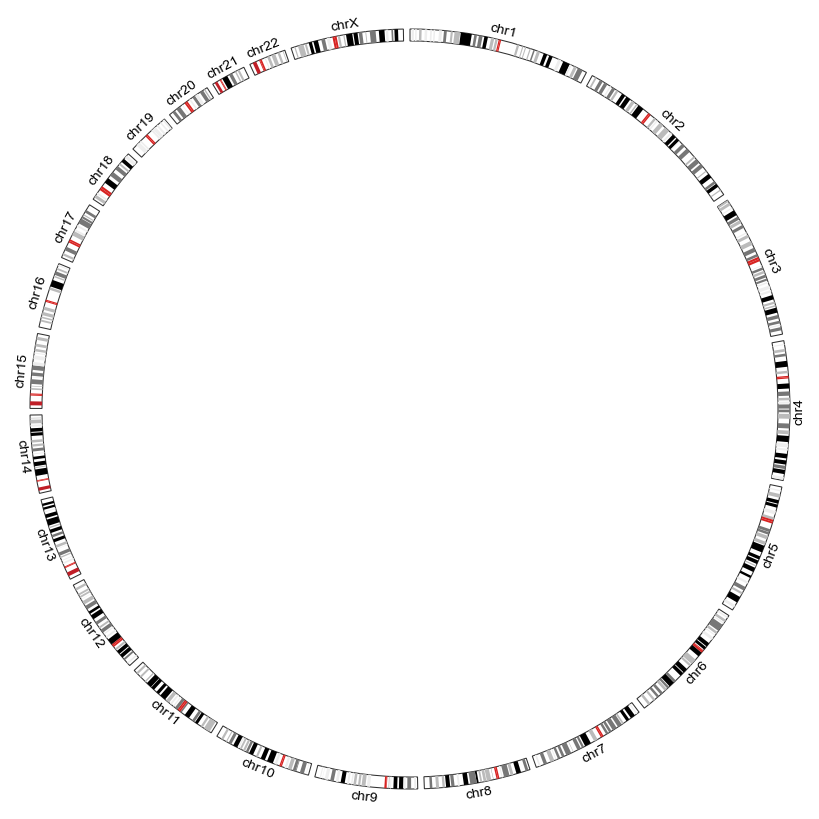

In [12]:
color_dict = {"gneg": "#FFFFFF00", "gpos25": "#EEEEEE", "gpos50": "#BBBBBB", "gpos75": "#777777",
              "gpos100": "#000000", "gvar": "#FFFFFF00", "stalk": "#C01E27", "acen": "#D82322"}
arcdata_dict = collections.defaultdict(dict)

for idx, line in df_cytoband.iterrows():
    # print(line)
    name = line['name']
    start = line['start']
    width = line['width']
    cyto = line['value2']

    if name not in arcdata_dict:
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["widths"] = []
        arcdata_dict[name]["colors"] = []
    arcdata_dict[name]["positions"].append(start)
    arcdata_dict[name]["widths"].append(width)
    arcdata_dict[name]["colors"].append(color_dict[cyto])

for key in arcdata_dict:
    circle.barplot(key, data=[1] * len(arcdata_dict[key]["positions"]), positions=arcdata_dict[key]["positions"],
                   width=arcdata_dict[key]["widths"], raxis_range=[920, 950], facecolor=arcdata_dict[key]["colors"])

circle.figure

#### plot point

[795, 915]
[675, 795]
[555, 675]
[435, 555]
[315, 435]
[195, 315]
[75, 195]


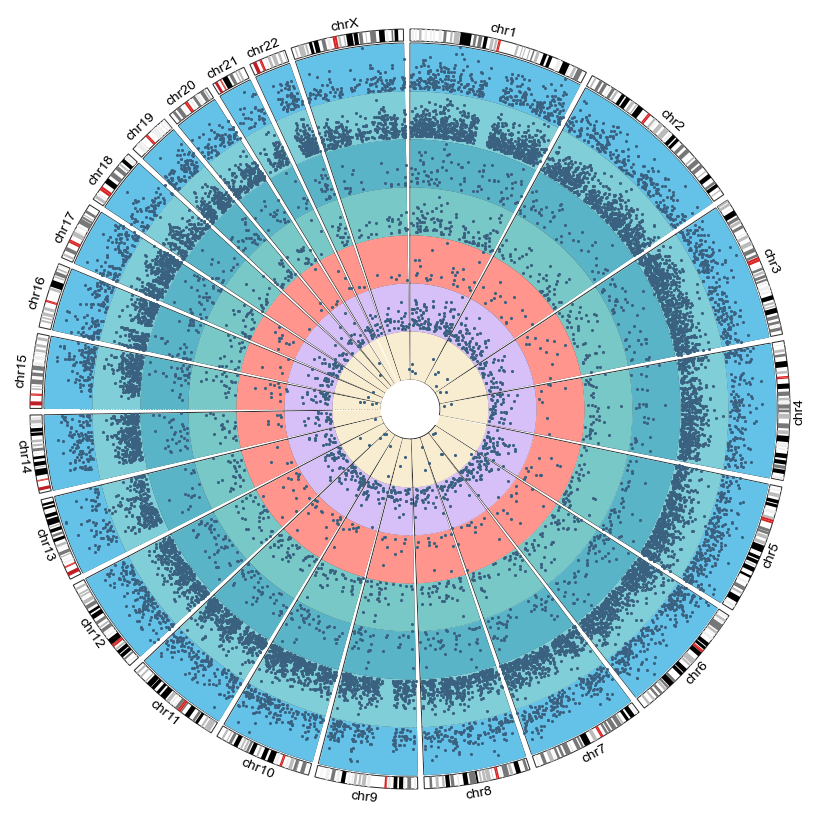

In [13]:
# %%% scatter plot  1s per 1k rows
color_dict = {"gneg": "#FFFFFF00", "gpos25": "#EEEEEE", "gpos50": "#BBBBBB", "gpos75": "#777777",
              "gpos100": "#000000", "gvar": "#FFFFFF00", "stalk": "#C01E27", "acen": "#D82322"}
keys_colors = list(zip(sort_keys, colors))
raxis_range = [915, 1035]

for sort_key, color in keys_colors:
    df = df_points.query('`<sample>`==@sort_key')
    df = df.copy()

    df['pos'] = raxis_range[1] - raxis_range[0]
    raxis_range[0] = raxis_range[0] - 120
    raxis_range[1] = raxis_range[1] - 120
    print(raxis_range)
    vmin = df['log10_value'].min()
    vmax = df['log10_value'].max()

    for idx, point in df_chrom.iterrows():  # 考虑把它放外头
        circle.fillplot(
            point['chr'],
            data=df['pos'],
            # data=[raxis_range[1] - raxis_range[0]],
            rlim=[0, raxis_range[1] - raxis_range[0]],
            raxis_range=raxis_range,
            facecolor=color,
            edgecolor='white'
        )

    for chrom, point in df.groupby('chr'):
        # print(point)
        # print(color)

        circle.scatterplot(
            chrom,
            data=point['log10_value'],
            positions=(point['start'] + point['end']) / 2,
            rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
            raxis_range=raxis_range,
            facecolor="#3B6181",
            # edgecolor='black',
            spine=True,
            markersize=5
        )

circle.figure

In [14]:
# %%% save fig 1s per 1k rows
# !pwd
circle.figure.savefig("../pycircos/project_out.pdf", dpi=300)

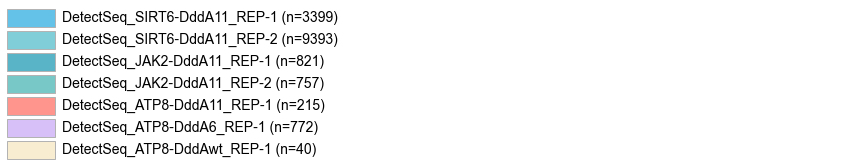

In [15]:
# %%% plot legend
df_sort_keys = pd.DataFrame(sort_keys, columns=['<sample>'])
df_sort_values = df_points.groupby('<sample>').count()['chr'].reset_index()
labels = pd.merge(df_sort_keys, df_sort_values).apply(
    lambda x: f'{x["<sample>"]} (n={x["chr"]})', axis=1
)

plot_colortable(colors=colors, ncols=1, labels=labels.tolist())
plt.savefig("../pycircos/project_out_legend.pdf")